In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 

## Cargamos dataset

In [2]:
df_cardiovascualar = pd.read_csv('Cardiovascular_Disease_Dataset.csv')
df_cardiovascualar

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9949544,48,1,2,139,349,0,2,183,1,5.6,2,2,1
996,9953423,47,1,3,143,258,1,1,98,1,5.7,1,0,0
997,9965859,69,1,0,156,434,1,0,196,0,1.4,3,1,1
998,9988507,45,1,1,186,417,0,1,117,1,5.9,3,2,1


In [3]:
df_cardiovascualar_2 = pd.read_csv("Cardiovascular_Disease_Dataset_2.csv")
df_cardiovascualar_2

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df_cardiovascualar_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df_cardiovascualar_2.duplicated().sum()

np.int64(0)

### Diferentes encoder

In [6]:
le = LabelEncoder()
df_cardiovascualar_2['Sex'] = le.fit_transform(df_cardiovascualar_2['Sex'])

df_cardiovascualar_2['ExerciseAngina'] = (df_cardiovascualar_2['ExerciseAngina'] == 'Y').apply(int)

ChestPainType_order = {"TA":0, "ATA":1,"NAP":2, "ASY":3}
df_cardiovascualar_2['ChestPainType'] = df_cardiovascualar_2['ChestPainType'].map(ChestPainType_order)

RestingECG_order = {"Normal": 0, "ST": 1, "LVH":2}
df_cardiovascualar_2['RestingECG'] = df_cardiovascualar_2['RestingECG'].map(RestingECG_order)

ST_Slope_order = {"Up":1, "Flat":2, "Down":3 }
df_cardiovascualar_2['ST_Slope'] = df_cardiovascualar_2['ST_Slope'].map(ST_Slope_order)

In [7]:
print(df_cardiovascualar_2.columns, df_cardiovascualar.columns)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object') Index(['patientid', 'age', 'gender', 'chestpain', 'restingBP',
       'serumcholestrol', 'fastingbloodsugar', 'restingrelectro',
       'maxheartrate', 'exerciseangia', 'oldpeak', 'slope', 'noofmajorvessels',
       'target'],
      dtype='object')


In [8]:
df_cardiovascualar_2.columns = df_cardiovascualar.drop(columns=['patientid','noofmajorvessels']).columns

In [9]:
df_cardiovascualar_2

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,target
0,40,1,1,140,289,0,0,172,0,0.0,1,0
1,49,0,2,160,180,0,0,156,0,1.0,2,1
2,37,1,1,130,283,0,1,98,0,0.0,1,0
3,48,0,3,138,214,0,0,108,1,1.5,2,1
4,54,1,2,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,0,110,264,0,0,132,0,1.2,2,1
914,68,1,3,144,193,1,0,141,0,3.4,2,1
915,57,1,3,130,131,0,0,115,1,1.2,2,1
916,57,0,1,130,236,0,2,174,0,0.0,2,1


In [10]:
df_cardiovascualar_2.equals(df_cardiovascualar.drop(columns=['patientid']))

False

In [11]:
df_cardiovascualar_2.target.value_counts()

target
1    508
0    410
Name: count, dtype: int64

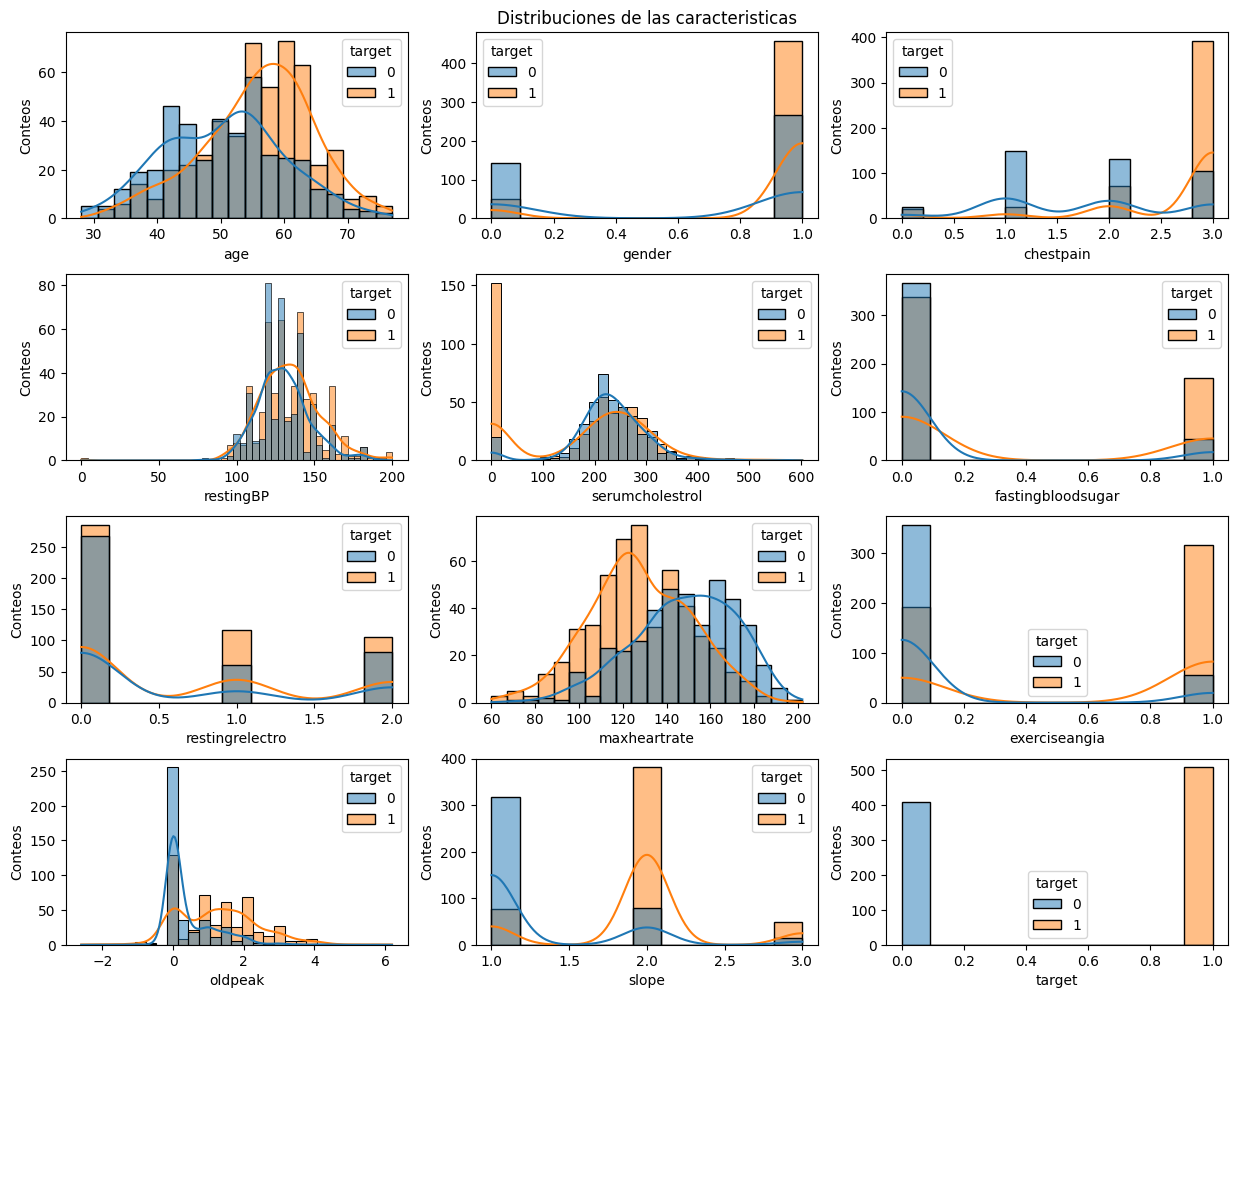

In [12]:
plt.figure(figsize=(15,15))
plt.title("Distribuciones de las caracteristicas")
plt.subplots_adjust(wspace=0.2, hspace=0.3) 
plt.axis('off')
for i, col in enumerate(df_cardiovascualar_2.columns):
    plt.subplot(5,3,i+1)
    sns.histplot(x=col, data=df_cardiovascualar_2,hue='target', kde=True)
    plt.ylabel("Conteos")

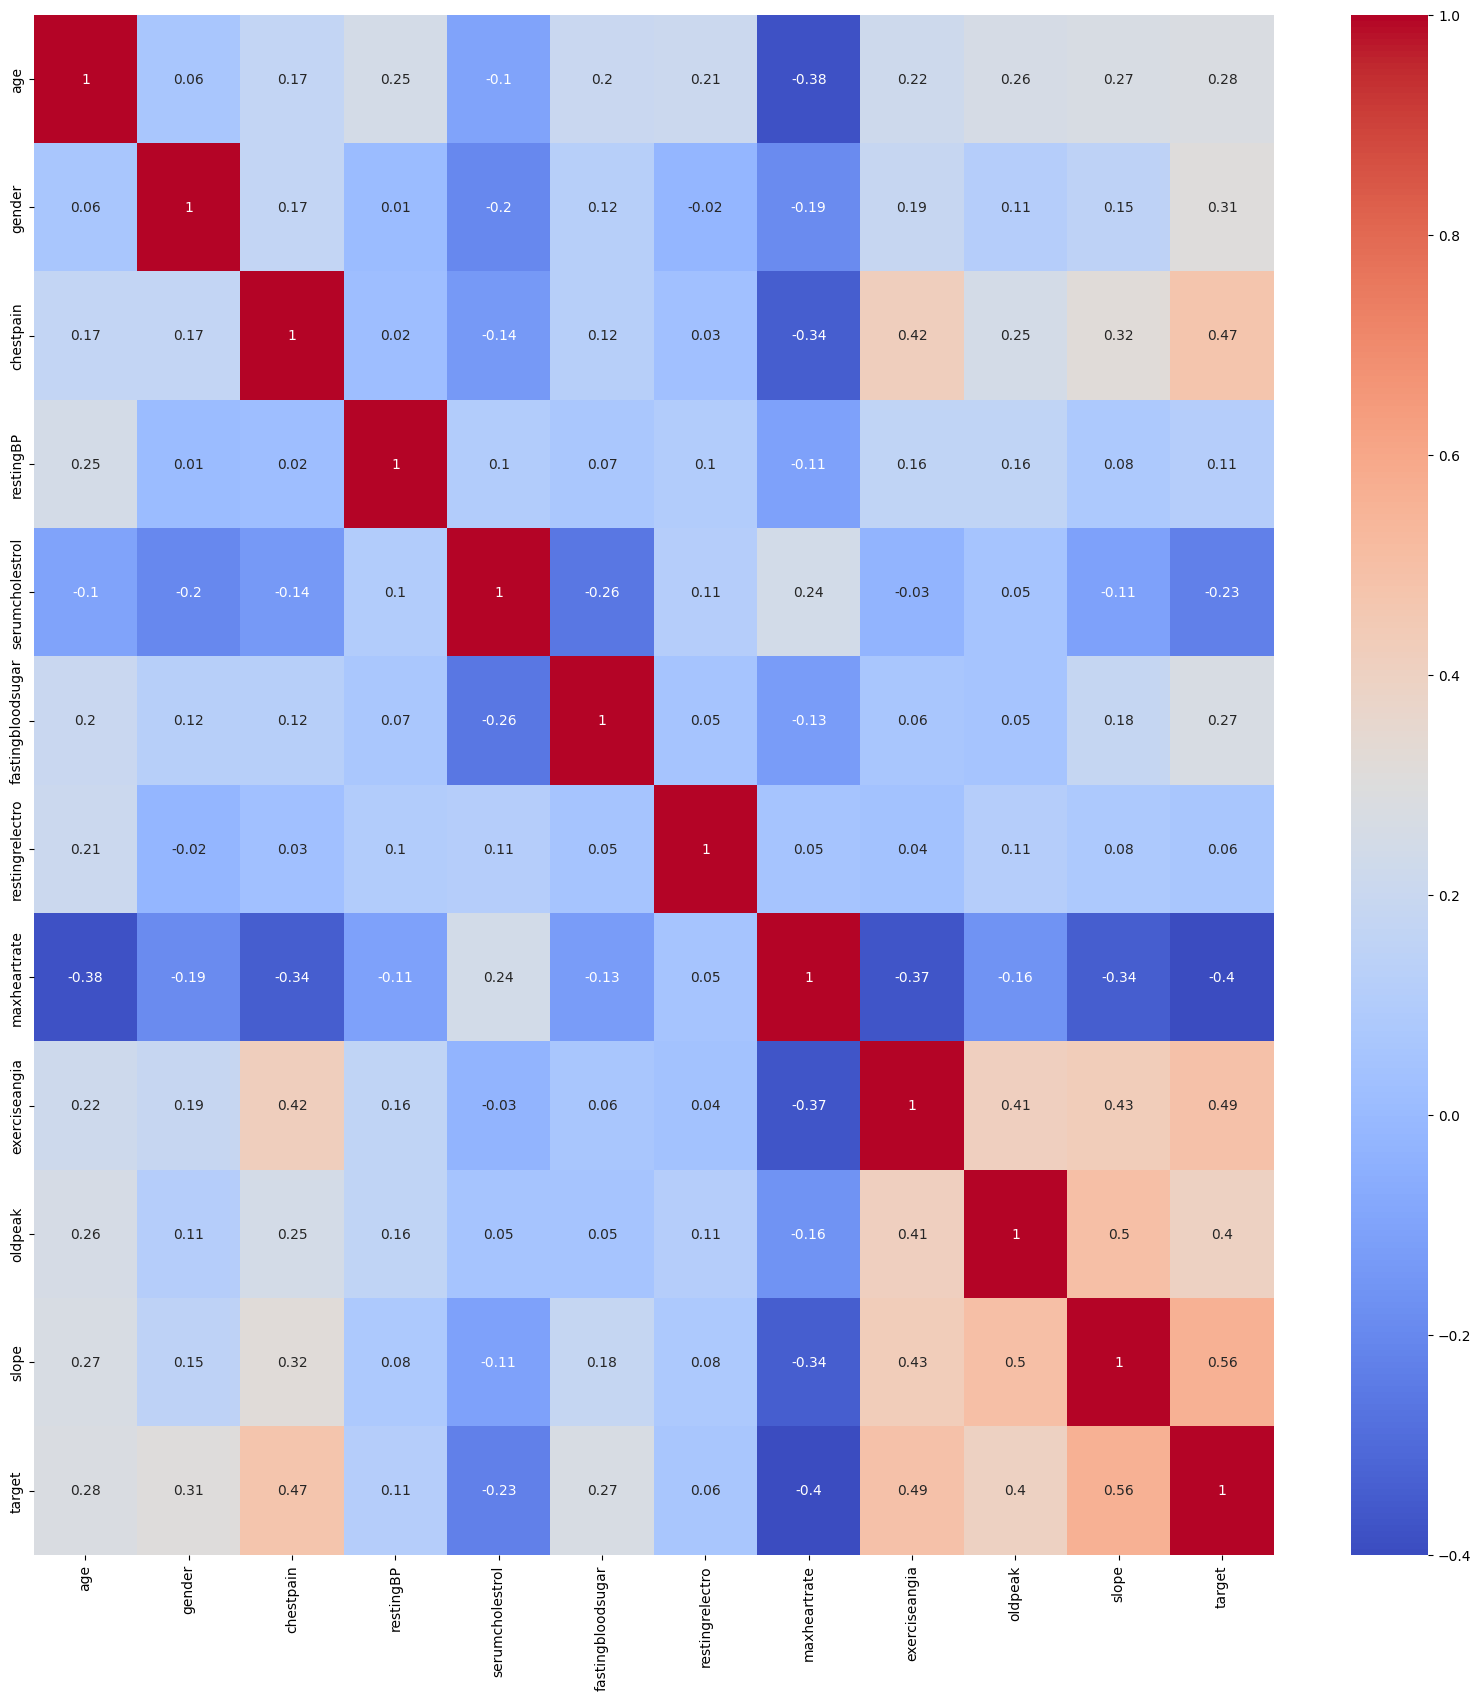

In [13]:
plt.figure(figsize = (20, 20)) 
sns.heatmap(data=round(df_cardiovascualar_2.corr(), 2), annot= True,cmap='coolwarm')
plt.show()

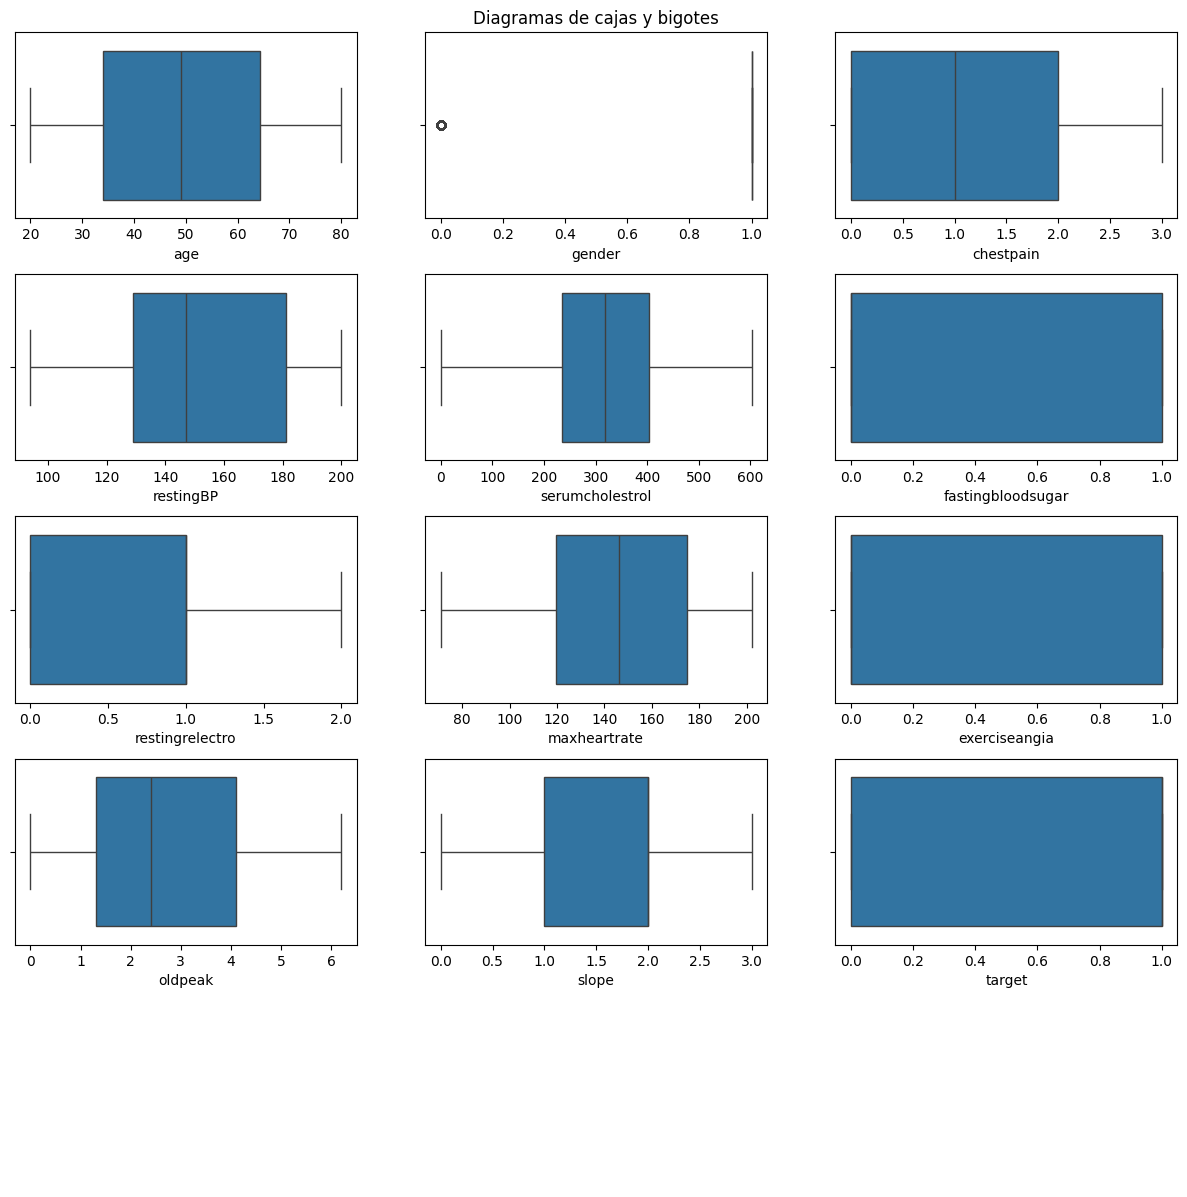

In [14]:
plt.figure(figsize=(15,15))
plt.title("Diagramas de cajas y bigotes")
plt.subplots_adjust(wspace=0.2, hspace=0.3) 
plt.axis('off')
for i, col in enumerate(df_cardiovascualar_2.columns):
    plt.subplot(5,3,i+1)
    sns.boxplot(x=col, data=df_cardiovascualar)

In [15]:
df_cardiovascualar_2[df_cardiovascualar_2 <= 0 ].nunique()

age                   0
gender                1
chestpain             1
restingBP             1
serumcholestrol       1
fastingbloodsugar     1
restingrelectro       1
maxheartrate          0
exerciseangia         1
oldpeak              11
slope                 0
target                1
dtype: int64

De la celda de arriba podemos ver que hay 2 caracteristicas con valores iguales o debajo de cero que no corresponden a su rango, las columnas son "serumcholestrol" y "restingBP"

In [16]:
df_cardiovascualar_2[df_cardiovascualar_2["serumcholestrol"] == 0]

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,target
293,65,1,3,115,0,0,0,93,1,0.0,2,1
294,32,1,0,95,0,1,0,127,0,0.7,1,1
295,61,1,3,105,0,1,0,110,1,1.5,1,1
296,50,1,3,145,0,1,0,139,1,0.7,2,1
297,57,1,3,110,0,1,1,131,1,1.4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,1,3,122,0,0,0,120,0,0.5,1,1
515,63,1,2,130,0,1,1,160,0,3.0,2,0
518,48,1,2,102,0,1,1,110,1,1.0,3,1
535,56,1,3,130,0,0,2,122,1,1.0,2,1


In [17]:
df_cardiovascualar_2[df_cardiovascualar_2["serumcholestrol"] == 0]["target"].value_counts()

target
1    152
0     20
Name: count, dtype: int64

In [8]:
df_cardiovascualar_2 = df_cardiovascualar_2[df_cardiovascualar_2["serumcholestrol"] != 0]

In [9]:
df_cardiovascualar_2.target.value_counts()

target
0    390
1    356
Name: count, dtype: int64

In [10]:
df_cardiovascualar_2.to_csv('Cardiovascular_Disease_Dataset_2_Filtered.csv', index=False)